# Demo2:分類電影評論 - 二元分類範例

### 載入 IMDB 資料集

In [1]:
from tensorflow.keras.datasets import imdb  #從 keras.datasets 套件中匯入 imdb 資料

(train_data, train_labels),(test_data, test_labels)= imdb.load_data(
    num_words=10000)  #從 imdb 中讀取, 只有在訓練集當中最常用的前 10,000 個單字才會被載入, 分別存入 (訓練資料, 訓練標籤) 和 (測試資料, 測試標籤)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
train_data[0]  #取第 0 篇評論

In [3]:
train_labels[0]  #第 0 篇評論的評價 : 1=正評；0=負評

1

In [4]:
print(len(train_labels), train_labels)

25000 [1 0 0 ... 0 1 0]


### 將整數 list 編碼成二元矩陣

In [5]:
import numpy as np  #匯入 numpy 模組, 後續程式以 np 使用

def vectorize_sequences(sequences, dimension=10000):  #sequences 將傳入 train_data
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #用 enumerate 取元素值
        results[i, sequence] = 1.   #將 result[i] 特定索引值的數值設定為 1
    return results
    
x_train = vectorize_sequences(train_data)  #向量化訓練資料
x_test = vectorize_sequences(test_data)  #向量化測試資料

In [6]:
len(x_train[0]), x_train[0]

(10000, array([0., 1., 1., ..., 0., 0., 0.]))

In [7]:
y_train = np.asarray(train_labels).astype('float32')  #向量化訓練標籤
y_test = np.asarray(test_labels).astype('float32')  #向量化測試標籤

### 建立模型

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(16, activation='relu'))  #隱藏層
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

### 編譯模型

In [9]:
from tensorflow.keras import optimizers

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])  #建立訓練模型


### 設定驗證資料集

In [10]:
x_val = x_train[:10000]  #取輸入資料的前 10000 個做驗證 (val)
partial_x_train = x_train[10000:]  #輸入資料的第 10000 個開始才是訓練資料
y_val = y_train[:10000]  #對應的, 要取標籤的前 10000 個做為驗證標籤
partial_y_train = y_train[10000:]  #從標籤的第 10000 個開始才是訓練資料的標籤

### 訓練模型

In [11]:
#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

Epoch 1/20
30/30 [==============================] - 2s 69ms/step - loss: 0.5056 - acc: 0.7818 - val_loss: 0.3710 - val_acc: 0.8723
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2963 - acc: 0.9034 - val_loss: 0.3142 - val_acc: 0.8766
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2180 - acc: 0.9289 - val_loss: 0.2759 - val_acc: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1725 - acc: 0.9445 - val_loss: 0.2742 - val_acc: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1395 - acc: 0.9559 - val_loss: 0.2943 - val_acc: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1170 - acc: 0.9637 - val_loss: 0.3030 - val_acc: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0943 - acc: 0.9730 - val_loss: 0.3151 - val_acc: 0.8833
Epoch 8/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0805 - a

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [14]:
history_dict['acc']

[0.7817999720573425,
 0.9034000039100647,
 0.928933322429657,
 0.9444666504859924,
 0.9558666944503784,
 0.9636666774749756,
 0.9729999899864197,
 0.9775999784469604,
 0.9808666706085205,
 0.9857333302497864,
 0.9890666604042053,
 0.9910666942596436,
 0.992733359336853,
 0.9955333471298218,
 0.9972000122070312,
 0.9975333213806152,
 0.9986666440963745,
 0.9990666508674622,
 0.998199999332428,
 0.9998666644096375]

### 程式 3.9 繪製訓練與驗證的損失分數

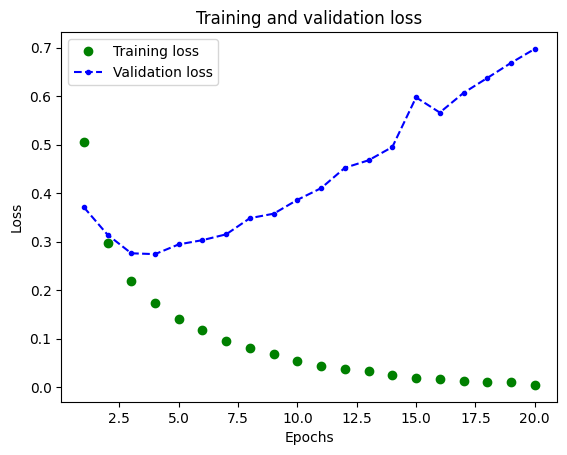

In [15]:
import matplotlib.pyplot as plt  #匯入 matplotlib.pyplot 模組, 後續程式用 plt 使用

history_dict = history.history
loss_values = history_dict['loss']  #取得每次訓練的 loss 訓練損失分數並存成 loss_values 變數
val_loss_values = history_dict['val_loss']  #取得每次驗證的 val_loss 驗證損失分數並指定給 val_loss_values 變數


epochs = range(1, len(loss_values)+ 1)  #len(loss_values) 項目個數為 20,範圍從 1 到 21 (不含 21) 的期間

plt.plot(epochs, loss_values, 'go', label='Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
plt.plot(epochs, val_loss_values, 'b--.', label='Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
plt.title('Training and validation loss')
plt.xlabel('Epochs')  #將此圖表標題的 x 軸設為訓練週期分數
plt.ylabel('Loss')  #將此圖表標題的 y 軸設為損失
plt.legend()  #可以追加每個輸出圖表的圖像名稱

plt.show()  #顯示圖表

### 程式 3.10 繪製訓練和驗證的準確度

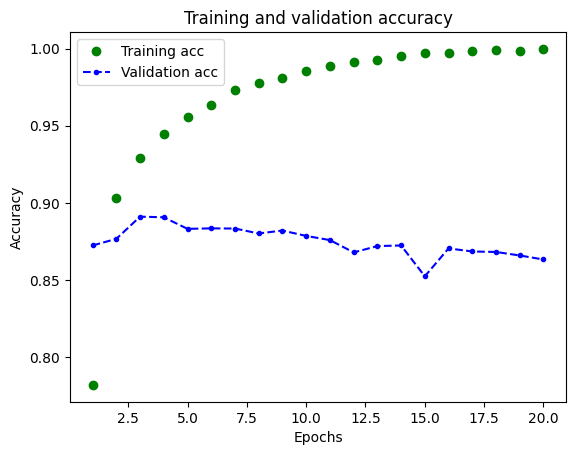

In [16]:
plt.clf()  #清除圖表
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'b--.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()